In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_all = pd.read_csv("submitted-runs.tsv", sep ="\t")
df_all.head(3)

,dataset,team,run_id,Precision,Recall,F1,Precision Self-direction: thought,Recall Self-direction: thought,F1 Self-direction: thought,Precision Self-direction: action,...,F1 Universalism: concern,Precision Universalism: nature,Recall Universalism: nature,F1 Universalism: nature,Precision Universalism: tolerance,Recall Universalism: tolerance,F1 Universalism: tolerance,Precision Universalism: objectivity,Recall Universalism: objectivity,F1 Universalism: objectivity
0,arguments-test,adam-smith,2023-01-27-17-09-53,0.564,0.545,0.555,0.525,0.671,0.589,0.701,...,0.742,0.845,0.833,0.839,0.424,0.400,0.412,0.659,0.439,0.527
1,arguments-test,adam-smith,2023-01-27-17-40-41,0.617,0.481,0.541,0.634,0.594,0.614,0.742,...,0.763,0.892,0.806,0.847,0.488,0.313,0.381,0.711,0.376,0.492
2,arguments-test,adam-smith,2023-01-27-18-10-45,0.514,0.619,0.561,0.488,0.692,0.572,0.673,...,0.732,0.780,0.861,0.818,0.387,0.579,0.464,0.590,0.461,0.517


In [3]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   dataset                               182 non-null    object 
 1   team                                  182 non-null    object 
 2   run_id                                182 non-null    object 
 3   Precision                             182 non-null    float64
 4   Recall                                182 non-null    float64
 5   F1                                    182 non-null    float64
 6   Precision Self-direction: thought     182 non-null    float64
 7   Recall Self-direction: thought        182 non-null    float64
 8   F1 Self-direction: thought            182 non-null    float64
 9   Precision Self-direction: action      182 non-null    float64
 10  Recall Self-direction: action         182 non-null    float64
 11  F1 Self-direction: 

In [33]:
#drop duplicates
print(len(df_all))
df_clean = df_all.drop_duplicates(subset=list(df_all)[3:])
print(len(df_clean))

182
173


In [34]:
# check unique datasets
df_arg_test = df_clean[df_clean["dataset"]=='arguments-test']
df_arg_test["dataset"].value_counts()

arguments-test    105
Name: dataset, dtype: int64

In [47]:
df_arg_test.describe()

,Precision,Recall,F1,Precision Self-direction: thought,Recall Self-direction: thought,F1 Self-direction: thought,Precision Self-direction: action,Recall Self-direction: action,F1 Self-direction: action,Precision Hedonism,...,F1 Universalism: concern,Precision Universalism: nature,Recall Universalism: nature,F1 Universalism: nature,Precision Universalism: tolerance,Recall Universalism: tolerance,F1 Universalism: tolerance,Precision Universalism: objectivity,Recall Universalism: objectivity,F1 Universalism: objectivity
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,...,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.425114,0.432638,0.410086,0.412029,0.487724,0.419962,0.566952,0.562752,0.545924,0.291638,...,0.665562,0.713210,0.648667,0.651571,0.325210,0.358286,0.305400,0.528000,0.348895,0.392895
std,0.139603,0.156956,0.118410,0.187678,0.189690,0.157461,0.192439,0.196581,0.172625,0.250862,...,0.128370,0.263831,0.240578,0.242627,0.121803,0.206153,0.120951,0.152286,0.172571,0.134750
min,0.074000,0.004000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.345000,0.354000,0.368000,0.311000,0.420000,0.398000,0.500000,0.529000,0.516000,0.067000,...,0.673000,0.718000,0.611000,0.644000,0.282000,0.210000,0.242000,0.453000,0.263000,0.363000
50%,0.458000,0.434000,0.451000,0.457000,0.510000,0.480000,0.622000,0.616000,0.600000,0.263000,...,0.708000,0.790000,0.722000,0.740000,0.320000,0.338000,0.344000,0.556000,0.335000,0.423000
75%,0.516000,0.529000,0.488000,0.566000,0.594000,0.523000,0.702000,0.675000,0.647000,0.400000,...,0.732000,0.868000,0.806000,0.800000,0.394000,0.518000,0.389000,0.612000,0.439000,0.483000
max,0.666000,1.000000,0.561000,0.838000,1.000000,0.614000,0.849000,1.000000,0.714000,1.000000,...,0.776000,1.000000,1.000000,0.870000,0.604000,1.000000,0.464000,0.765000,1.000000,0.577000


In [35]:
#group by team, get the best F1-score

idx = df_arg_test.groupby(['team'])['F1'].transform(max) == df_arg_test['F1']


df_comp = df_arg_test[idx]
df_comp.head()

,dataset,team,run_id,Precision,Recall,F1,Precision Self-direction: thought,Recall Self-direction: thought,F1 Self-direction: thought,Precision Self-direction: action,...,F1 Universalism: concern,Precision Universalism: nature,Recall Universalism: nature,F1 Universalism: nature,Precision Universalism: tolerance,Recall Universalism: tolerance,F1 Universalism: tolerance,Precision Universalism: objectivity,Recall Universalism: objectivity,F1 Universalism: objectivity
2,arguments-test,adam-smith,2023-01-27-18-10-45,0.514,0.619,0.561,0.488,0.692,0.572,0.673,...,0.732,0.780,0.861,0.818,0.387,0.579,0.464,0.590,0.461,0.517
6,arguments-test,andronicus-of-rhodes,2023-01-28-10-02-00,0.451,0.506,0.477,0.431,0.503,0.465,0.633,...,0.693,0.768,0.757,0.762,0.329,0.477,0.389,0.579,0.406,0.477
8,arguments-test,aristotle,BERT,0.587,0.329,0.422,0.580,0.357,0.442,0.702,...,0.673,0.846,0.611,0.710,0.444,0.246,0.317,0.600,0.223,0.325
13,arguments-test,aristoxenus,2023-01-23-19-44-41,0.489,0.457,0.472,0.631,0.538,0.581,0.691,...,0.758,0.757,0.778,0.767,0.302,0.390,0.340,0.550,0.314,0.400
17,arguments-test,arthur-caplan,2023-01-24-14-13-20,0.455,0.584,0.512,0.500,0.566,0.531,0.605,...,0.718,0.758,0.847,0.800,0.319,0.533,0.399,0.544,0.544,0.544


In [48]:
df_comp.describe()

,Precision,Recall,F1,Precision Self-direction: thought,Recall Self-direction: thought,F1 Self-direction: thought,Precision Self-direction: action,Recall Self-direction: action,F1 Self-direction: action,Precision Hedonism,...,F1 Universalism: concern,Precision Universalism: nature,Recall Universalism: nature,F1 Universalism: nature,Precision Universalism: tolerance,Recall Universalism: tolerance,F1 Universalism: tolerance,Precision Universalism: objectivity,Recall Universalism: objectivity,F1 Universalism: objectivity
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.00000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.461175,0.446725,0.438975,0.461325,0.502525,0.46055,0.619475,0.586975,0.58940,0.344225,...,0.677175,0.769100,0.669225,0.695600,0.34450,0.364475,0.326925,0.551925,0.349550,0.405575
std,0.116312,0.132235,0.103745,0.155764,0.162473,0.12330,0.148555,0.157371,0.13075,0.252279,...,0.142507,0.196116,0.197222,0.199682,0.10098,0.180916,0.114224,0.132171,0.151731,0.128624
min,0.150000,0.004000,0.008000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.010000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.419250,0.381500,0.419750,0.403750,0.434000,0.42725,0.553500,0.548500,0.57475,0.178250,...,0.681250,0.750500,0.607500,0.688500,0.30900,0.273000,0.309000,0.528000,0.263000,0.370000
50%,0.481000,0.450000,0.465500,0.494000,0.513500,0.48600,0.652500,0.625500,0.61400,0.318000,...,0.714000,0.809500,0.725500,0.751000,0.33600,0.369000,0.361000,0.556500,0.320500,0.421500
75%,0.537750,0.541000,0.496000,0.577750,0.588750,0.53000,0.717500,0.669750,0.65800,0.458000,...,0.732750,0.867250,0.786500,0.800250,0.39875,0.534250,0.399500,0.612250,0.455750,0.491500
max,0.666000,0.642000,0.561000,0.680000,0.769000,0.59500,0.818000,0.798000,0.71400,1.000000,...,0.776000,1.000000,0.861000,0.858000,0.52300,0.656000,0.464000,0.765000,0.618000,0.577000


In [36]:
df_comp[df_comp["team"]=="robert-s-hartman"]

,dataset,team,run_id,Precision,Recall,F1,Precision Self-direction: thought,Recall Self-direction: thought,F1 Self-direction: thought,Precision Self-direction: action,...,F1 Universalism: concern,Precision Universalism: nature,Recall Universalism: nature,F1 Universalism: nature,Precision Universalism: tolerance,Recall Universalism: tolerance,F1 Universalism: tolerance,Precision Universalism: objectivity,Recall Universalism: objectivity,F1 Universalism: objectivity
86,arguments-test,robert-s-hartman,2023-01-27-15-03-52,0.566,0.419,0.482,0.602,0.455,0.518,0.706,...,0.723,0.853,0.764,0.806,0.394,0.333,0.361,0.649,0.263,0.375


In [37]:
df_comp["team"].value_counts()

adam-smith                  1
andronicus-of-rhodes        1
marquis-de-sade             1
martha-nussbaum             1
mary-daly                   1
niccolo-machiavellie        1
noam-chomsky                1
philippa-foot               1
prodicus                    1
quintilian                  1
r-m-hare                    1
robert-s-hartman            1
rudolf-christoph-eucken     1
seyyed-hossein-nasr         1
soren-kierkegaard           1
stanley-grenz               1
t-m-scanlon                 1
tenzin-gyatso               1
theodor-zwinger             1
mao-zedong                  1
lauri-ingman                1
joseph-fletcher             1
fazlur-rahman               1
aristotle                   1
aristoxenus                 1
arthur-caplan               1
augustine-of-hippo          1
confucius                   1
david-gauthier              1
epicurus                    1
francis-bacon               1
john-arthur                 1
francisco-de-vitoria        1
friedrich-

In [49]:
df_comp.describe()

,Precision,Recall,F1,Precision Self-direction: thought,Recall Self-direction: thought,F1 Self-direction: thought,Precision Self-direction: action,Recall Self-direction: action,F1 Self-direction: action,Precision Hedonism,...,F1 Universalism: concern,Precision Universalism: nature,Recall Universalism: nature,F1 Universalism: nature,Precision Universalism: tolerance,Recall Universalism: tolerance,F1 Universalism: tolerance,Precision Universalism: objectivity,Recall Universalism: objectivity,F1 Universalism: objectivity
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.00000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.461175,0.446725,0.438975,0.461325,0.502525,0.46055,0.619475,0.586975,0.58940,0.344225,...,0.677175,0.769100,0.669225,0.695600,0.34450,0.364475,0.326925,0.551925,0.349550,0.405575
std,0.116312,0.132235,0.103745,0.155764,0.162473,0.12330,0.148555,0.157371,0.13075,0.252279,...,0.142507,0.196116,0.197222,0.199682,0.10098,0.180916,0.114224,0.132171,0.151731,0.128624
min,0.150000,0.004000,0.008000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.010000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.419250,0.381500,0.419750,0.403750,0.434000,0.42725,0.553500,0.548500,0.57475,0.178250,...,0.681250,0.750500,0.607500,0.688500,0.30900,0.273000,0.309000,0.528000,0.263000,0.370000
50%,0.481000,0.450000,0.465500,0.494000,0.513500,0.48600,0.652500,0.625500,0.61400,0.318000,...,0.714000,0.809500,0.725500,0.751000,0.33600,0.369000,0.361000,0.556500,0.320500,0.421500
75%,0.537750,0.541000,0.496000,0.577750,0.588750,0.53000,0.717500,0.669750,0.65800,0.458000,...,0.732750,0.867250,0.786500,0.800250,0.39875,0.534250,0.399500,0.612250,0.455750,0.491500
max,0.666000,0.642000,0.561000,0.680000,0.769000,0.59500,0.818000,0.798000,0.71400,1.000000,...,0.776000,1.000000,0.861000,0.858000,0.52300,0.656000,0.464000,0.765000,0.618000,0.577000


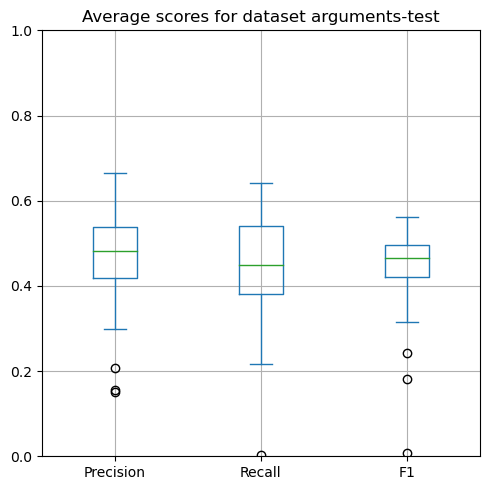

In [99]:
df_comp[["Precision", "Recall","F1"]].plot(kind='box', figsize=(5,5));
plt.ylim(0,1)
plt.grid()
plt.title("Average scores for dataset arguments-test")
plt.tight_layout()
plt.savefig("./fig/avg_scores.png")

In [93]:
col_list = list(df_all)[6:]
F1_substring = 'F1'
Prec_substring = 'Precision'
Rec_substring = 'Recall'


# Getting string with substring
# using filter() + lambda
F1_list = list(filter(lambda x: F1_substring in x, col_list))
Prec_list = list(filter(lambda x: Prec_substring in x, col_list))
Rec_list = list(filter(lambda x: Rec_substring in x, col_list))


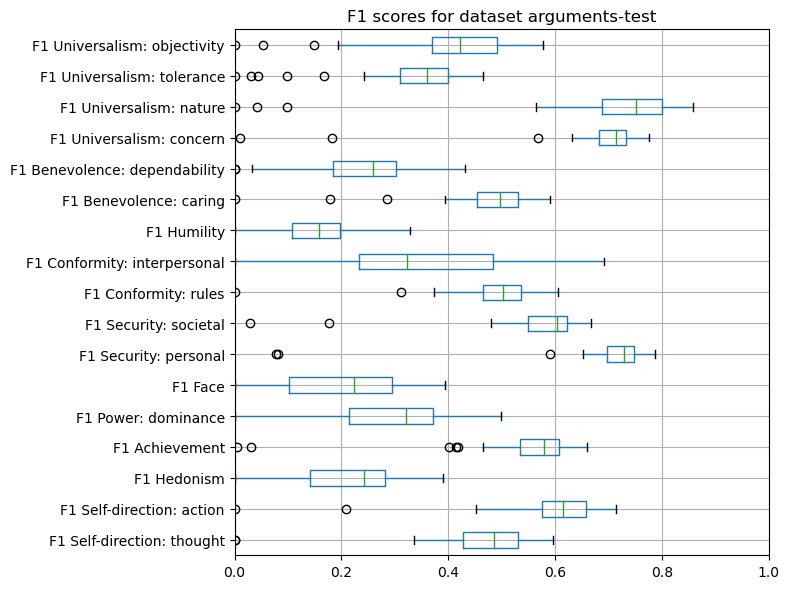

In [100]:
df_comp[F1_list].boxplot(figsize=(8,6),vert=False);
plt.xlim(0,1)
#plt.ylim(0,1)
#plt.grid()
plt.title("F1 scores for dataset arguments-test")
plt.tight_layout()
plt.savefig("./fig/F1_scores.png")

'Precision'

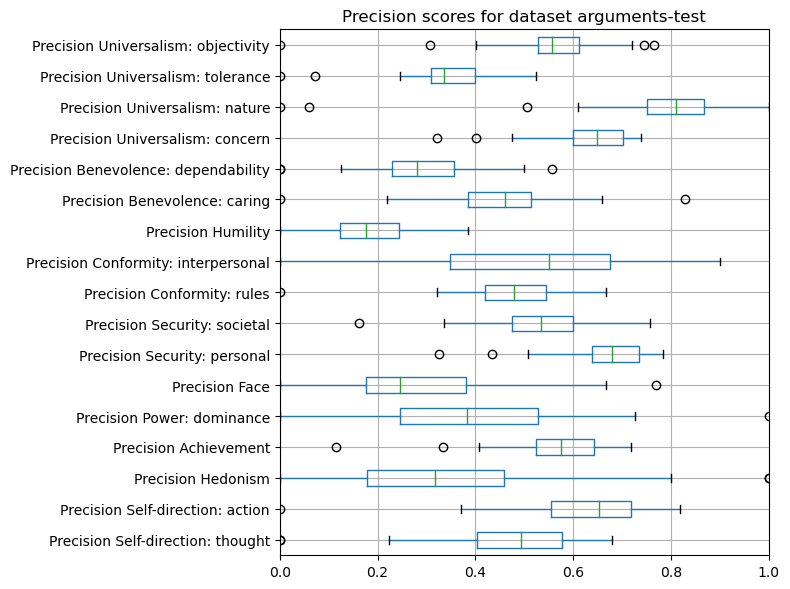

In [101]:
df_comp[Prec_list].boxplot(figsize=(8,6),vert=False);
plt.xlim(0,1)
#plt.ylim(0,1)
#plt.grid()
plt.title("Precision scores for dataset arguments-test")
plt.tight_layout()
plt.savefig("./fig/Prec_scores.png")

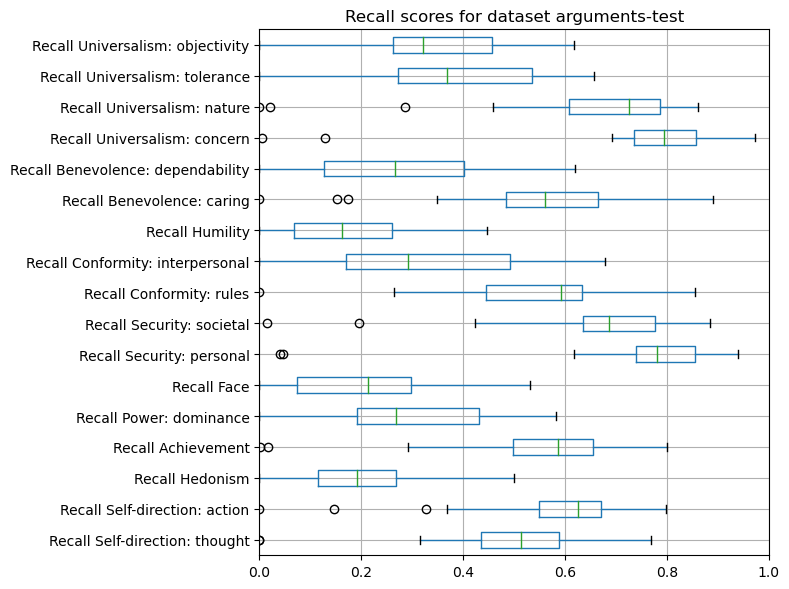

In [102]:
df_comp[Rec_list].boxplot(figsize=(8,6),vert=False);
plt.xlim(0,1)
#plt.ylim(0,1)
#plt.grid()
plt.title("Recall scores for dataset arguments-test")
plt.tight_layout()
plt.savefig("./fig/Rec_scores.png")

## classification

In [128]:
# as a first attempt, let's start with something basic and thus a classification problem which is just binary
# i chose a random feature and the classification will be about Power: dominance vs not Power: dominance

X=training_data.processed_text

y=training_data["Power: dominance"]

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)


In [130]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

## pipeline

In [131]:
import numpy as np

In [132]:
bin_pipeline = Pipeline([
    ('vect', CountVectorizer()),  # feature extraction
    ('sel', SelectKBest(chi2, k=100)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

bin_pipeline.fit(X_train,y_train)
bin_predictions = bin_pipeline.predict(X_valid)


correct = 0
for prediction,true_label in zip(bin_predictions, y_valid):
    if np.array_equal(bin_predictions, y_valid):
        correct += 1
print(correct/len(bin_predictions))

0.0


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [133]:
# classification report

from sklearn.metrics import confusion_matrix, classification_report
print('Classification report:')
print(classification_report(y_valid, bin_predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_valid, bin_predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1437
           1       0.48      0.12      0.19       181

    accuracy                           0.89      1618
   macro avg       0.69      0.55      0.56      1618
weighted avg       0.85      0.89      0.86      1618

Confusion matrix:
[[1414   23]
 [ 160   21]]
